In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#### Importar datos de geohash, cambiar para cada país

In [4]:
df = pd.read_csv('../Data/Geohashes/Chile.zip')
df.head()

,Unnamed: 0,geohash,g_adm_1,g_adm_3,month,day,n_visitantes_geohash,n_visitantes_adm3,n_visitantes_0,n_visitantes_1,...,n_visitantes_14,n_visitantes_15,n_visitantes_16,n_visitantes_17,n_visitantes_18,n_visitantes_19,n_visitantes_20,n_visitantes_21,n_visitantes_22,n_visitantes_23
0,0,66jt91k,5.0,5702.0,5,3,4,2,0,0,...,1,1,0,1,0,0,0,1,0,0
1,1,63knfd2,8.0,8107.0,3,16,15,11,1,0,...,3,4,1,1,2,2,0,1,1,0
2,2,637uz4p,8.0,8106.0,3,16,3,3,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,66jec5e,13.0,13303.0,5,6,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,66jcejx,13.0,13113.0,3,10,5,4,0,0,...,0,1,1,0,0,0,0,0,0,0


#### Eliminar columna de indice

In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.shape

(19166083, 31)

#### Importar datos de establecimientos que ya tienen geohash

In [7]:
df_establecimientos = pd.read_csv('../Data/EE_2019_CL_geohash.csv')

In [8]:
df_establecimientos.head(2)

,row_number,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,...,ENS_11,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL,lat,long,geohash
0,0,2019,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,AYP,...,0,1,1,2,,GRATUITO,GRATUITO,-18.487274,-70.294739,6kwnb6k
1,1,2019,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,AYP,...,0,1,1,2,,GRATUITO,GRATUITO,-18.469862,-70.302757,6kwnbjx


In [9]:
df_establecimientos.shape

(12937, 39)

Eliminar columnas que no sean necesarias (Depende de cada país)

In [10]:
df_establecimientos = df_establecimientos.drop(columns=['AGNO', 
                                                        'DGV_RBD',
                                                        'MRUN', 
                                                        'RUT_SOSTENEDOR',
                                                        'P_JURIDICA', 
                                                        'NOM_REG_RBD_A', 
                                                        'COD_PRO_RBD', 
                                                        'COD_DEPROV_RBD',
                                                        'NOM_DEPROV_RBD', 
                                                        'COD_DEPE', 
                                                        'COD_DEPE2',])

#### Cambiar nombre de columnas según pais

In [11]:
COD_ESCUELA_PAIS = 'RBD'
COD_ADM3 = 'COD_COM_RBD'
NOM_ADM3= 'NOM_COM_RBD'
COD_ADM1 = 'COD_REG_RBD'

In [12]:
df_establecimientos = df_establecimientos.rename(columns= {
    COD_ESCUELA_PAIS : 'COD_ESCUELA_PAIS',
    COD_ADM3 : 'COD_ADM3',
    NOM_ADM3 : 'NOM_ADM3',
    COD_ADM1 : 'COD_ADM1'
})

In [13]:
df_establecimientos.COD_ESCUELA_PAIS.nunique()

12937

#### Acá hay que verificar que pasa con los establecimientos. 
- Cuántos establecimientos que no tienen info?
- De qué comunas?

In [14]:
df_merge = df_establecimientos.merge(df,how='left',on='geohash',indicator=True)

In [15]:
df_merge.shape

(899851, 59)

In [16]:
df_merge.COD_ESCUELA_PAIS.nunique()

12937

In [17]:
df_merge.columns

Index(['row_number', 'COD_ESCUELA_PAIS', 'NOM_RBD', 'COD_ADM1', 'COD_ADM3',
       'NOM_ADM3', 'RURAL_RBD', 'CONVENIO_PIE', 'ENS_01', 'ENS_02', 'ENS_03',
       'ENS_04', 'ENS_05', 'ENS_06', 'ENS_07', 'ENS_08', 'ENS_09', 'ENS_10',
       'ENS_11', 'MATRICULA', 'ESTADO_ESTAB', 'ORI_RELIGIOSA',
       'ORI_OTRO_GLOSA', 'PAGO_MATRICULA', 'PAGO_MENSUAL', 'lat', 'long',
       'geohash', 'g_adm_1', 'g_adm_3', 'month', 'day', 'n_visitantes_geohash',
       'n_visitantes_adm3', 'n_visitantes_0', 'n_visitantes_1',
       'n_visitantes_2', 'n_visitantes_3', 'n_visitantes_4', 'n_visitantes_5',
       'n_visitantes_6', 'n_visitantes_7', 'n_visitantes_8', 'n_visitantes_9',
       'n_visitantes_10', 'n_visitantes_11', 'n_visitantes_12',
       'n_visitantes_13', 'n_visitantes_14', 'n_visitantes_15',
       'n_visitantes_16', 'n_visitantes_17', 'n_visitantes_18',
       'n_visitantes_19', 'n_visitantes_20', 'n_visitantes_21',
       'n_visitantes_22', 'n_visitantes_23', '_merge'],
      dtype='objec

#### Separar aquellos rbd que no tienen info de pings

In [18]:
df_merge_left_only = df_merge[df_merge['_merge']=='left_only']

In [19]:
df_merge_left_only.shape

(1779, 59)

In [20]:
df_merge_left_only.COD_ESCUELA_PAIS.nunique()

1779

In [21]:
df_merge_left_only.NOM_ADM3.nunique()

235

In [22]:
df_merge_left_only.NOM_ADM3.value_counts()

CARAHUE                54
NUEVA IMPERIAL         48
PADRE LAS CASAS        41
TEODORO SCHMIDT        36
GALVARINO              32
                       ..
LITUECHE                1
SAN PEDRO DE LA PAZ     1
NANCAGUA                1
SAN RAFAEL              1
COPIAPÓ                 1
Name: NOM_ADM3, Length: 235, dtype: int64

Guardo aquellos establecimientos que no tienen registros para tenerlos en cuenta

In [23]:
df_merge_left_only.to_csv('../Data/ee_sin_registros.csv', index=False)

#### Quedarnos solo con aquellos que tienen registros

In [24]:
df_merge = df_merge[df_merge['_merge']=='both']

In [25]:
df_merge.NOM_ADM3.nunique()

343

In [26]:
df_merge.COD_ESCUELA_PAIS.nunique()

11158

#### Transformar tipo mes y dia a entero

In [27]:
df_merge = df_merge.astype({'month':int,'day':int})

In [28]:
df_merge.shape

(898072, 59)

In [29]:
df_merge['semana'] = df_merge.apply(lambda x: pd.to_datetime(f'2020/{x.month}/{x.day}', format='%Y/%m/%d').week, axis=1)

In [30]:
df_merge['laboral'] = df_merge.apply(lambda x: 1 if pd.to_datetime(f'2020/{x.month}/{x.day}', format='%Y/%m/%d').weekday() < 5 else 0, axis=1)

#### Quedarse con registros solo de días laborales

In [31]:
df_merge = df_merge[df_merge['laboral']==1]

In [32]:
df_merge.shape

(654507, 61)

In [33]:
df_merge.COD_ESCUELA_PAIS.nunique()

11012

In [34]:
df_merge.NOM_ADM3.nunique()

343

(array([10441.,   147.,    80.,    25.,    54.,    34.,    71.,    40.,
           63.,    57.]),
 array([10. , 11.5, 13. , 14.5, 16. , 17.5, 19. , 20.5, 22. , 23.5, 25. ]),
 <a list of 10 Patch objects>)

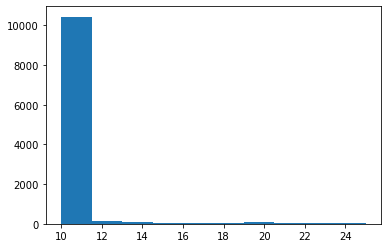

In [35]:
plt.hist(df_merge.groupby('COD_ESCUELA_PAIS').semana.min())

#### Obtener la primera semana con datos para cada establecimiento

In [36]:
df_primera_semana = df_merge.groupby(['COD_ESCUELA_PAIS','NOM_RBD','NOM_ADM3','COD_ADM3', 'COD_ADM1']).semana.min().reset_index()
df_ultima_semana = df_merge.groupby(['COD_ESCUELA_PAIS','NOM_RBD','NOM_ADM3','COD_ADM3', 'COD_ADM1']).semana.max().reset_index()
df_primera_semana.shape

(11012, 6)

In [37]:
primera_semana = df_primera_semana.semana.min()
ultima_semana = df_ultima_semana.semana.max()
primera_semana

10

#### Filtrar establecimientos que no tienen info la primera semana de marzo o la segunda semana de marzo (normalidad)

In [38]:
tercera_semana = primera_semana + 2
df_establecimientos_en_primeras_semanas = df_primera_semana[df_primera_semana['semana'] < tercera_semana]
df_establecimientos_en_primeras_semanas.shape

(10441, 6)

In [39]:
df_establecimientos_en_primeras_semanas = df_establecimientos_en_primeras_semanas.drop(columns = 'semana')
df_establecimientos_en_primeras_semanas.head()

,COD_ESCUELA_PAIS,NOM_RBD,NOM_ADM3,COD_ADM3,COD_ADM1
0,1,LICEO POLITECNICO ARICA,ARICA,15101,15
1,2,PARVULARIO LAS ESPIGUITAS,ARICA,15101,15
2,4,LICEO OCTAVIO PALMA PEREZ,ARICA,15101,15
3,5,JOVINA NARANJO FERNANDEZ,ARICA,15101,15
4,7,L. POLI. ANTONIO VARAS DE LA BARRA,ARICA,15101,15


In [40]:
df_merge = df_establecimientos_en_primeras_semanas.merge(df_merge, 
                                                         on=['COD_ESCUELA_PAIS','NOM_RBD','NOM_ADM3','COD_ADM3','COD_ADM1'], 
                                                         how='left')

Disminuye la cantidad de registros porque solo quedan aquellas escuelas con registros en las dos primeras semanas

In [41]:
df_merge.shape

(652898, 61)

In [42]:
df_merge = df_merge.drop(columns = '_merge')

Eliminar columnas en caso de necesitar liberar ram

In [43]:
df_merge_sin_imputar = df_merge[['COD_ESCUELA_PAIS','NOM_RBD','NOM_ADM3','COD_ADM3','month', 'day',
       'n_visitantes_geohash', 'n_visitantes_adm3', 'n_visitantes_0',
       'n_visitantes_1', 'n_visitantes_2', 'n_visitantes_3', 'n_visitantes_4',
       'n_visitantes_5', 'n_visitantes_6', 'n_visitantes_7', 'n_visitantes_8',
       'n_visitantes_9', 'n_visitantes_10', 'n_visitantes_11',
       'n_visitantes_12', 'n_visitantes_13', 'n_visitantes_14',
       'n_visitantes_15', 'n_visitantes_16', 'n_visitantes_17',
       'n_visitantes_18', 'n_visitantes_19', 'n_visitantes_20',
       'n_visitantes_21', 'n_visitantes_22', 'n_visitantes_23', 'semana',]]
df_merge_sin_imputar.shape


(652898, 33)

In [44]:
df_merge_sin_imputar.to_excel('../Data/escuelas_semanas_visitas_sin_imputar.xlsx', index=False)

In [45]:
df_merge.columns

Index(['COD_ESCUELA_PAIS', 'NOM_RBD', 'NOM_ADM3', 'COD_ADM3', 'COD_ADM1',
       'row_number', 'RURAL_RBD', 'CONVENIO_PIE', 'ENS_01', 'ENS_02', 'ENS_03',
       'ENS_04', 'ENS_05', 'ENS_06', 'ENS_07', 'ENS_08', 'ENS_09', 'ENS_10',
       'ENS_11', 'MATRICULA', 'ESTADO_ESTAB', 'ORI_RELIGIOSA',
       'ORI_OTRO_GLOSA', 'PAGO_MATRICULA', 'PAGO_MENSUAL', 'lat', 'long',
       'geohash', 'g_adm_1', 'g_adm_3', 'month', 'day', 'n_visitantes_geohash',
       'n_visitantes_adm3', 'n_visitantes_0', 'n_visitantes_1',
       'n_visitantes_2', 'n_visitantes_3', 'n_visitantes_4', 'n_visitantes_5',
       'n_visitantes_6', 'n_visitantes_7', 'n_visitantes_8', 'n_visitantes_9',
       'n_visitantes_10', 'n_visitantes_11', 'n_visitantes_12',
       'n_visitantes_13', 'n_visitantes_14', 'n_visitantes_15',
       'n_visitantes_16', 'n_visitantes_17', 'n_visitantes_18',
       'n_visitantes_19', 'n_visitantes_20', 'n_visitantes_21',
       'n_visitantes_22', 'n_visitantes_23', 'semana', 'laboral'],
      d

#### Completar datos

Crear df de todas las semanas del dataset

In [46]:
semanas = pd.DataFrame({'semana':list(range(primera_semana, ultima_semana+1))})
semanas['key'] = 'a'

Merge con lista de escuelas con datos en todas las semanas

In [47]:
df_establecimientos_en_primeras_semanas['key'] = 'a'
df_establecimientos_semanas = df_establecimientos_en_primeras_semanas.merge(semanas, on='key', how='outer').drop(columns=['key']).reset_index(drop=True)

In [48]:
df_establecimientos_en_primeras_semanas.shape

(10441, 6)

In [49]:
df_merge_completo = df_establecimientos_semanas.merge(df_merge,on=['COD_ESCUELA_PAIS','semana'], how='left', suffixes=['','_drop']).filter(regex="^(?!.*_drop)")

In [50]:
df_merge_completo.shape

(669591, 60)

##### Verificar completitud

In [51]:
n_semana_por_establecimiento = df_merge_completo.groupby(['COD_ESCUELA_PAIS','COD_ADM1']).semana.nunique().reset_index()

Si no se hubiese imputado con 0 las semanas sin visita, acá aparecerían regiones con menos semanas

In [52]:
n_semana_por_establecimiento.semana.value_counts()

16    10441
Name: semana, dtype: int64

#### Agrupar datos por comuna y semana

In [53]:
df_grouped = df_merge_completo.groupby(['COD_ADM1','COD_ADM3','NOM_ADM3','semana']).agg({'geohash':'nunique',
                                                   'n_visitantes_geohash':'sum',
                                                   'n_visitantes_adm3':'sum',
                                                   'n_visitantes_0':'sum',
                                                   'n_visitantes_1':'sum',
                                                   'n_visitantes_2':'sum',
                                                   'n_visitantes_3':'sum',
                                                   'n_visitantes_4':'sum',
                                                   'n_visitantes_5':'sum',
                                                   'n_visitantes_6':'sum',
                                                   'n_visitantes_7':'sum',
                                                   'n_visitantes_8':'sum',
                                                   'n_visitantes_9':'sum',
                                                   'n_visitantes_10':'sum',
                                                   'n_visitantes_11':'sum',
                                                   'n_visitantes_12':'sum',
                                                   'n_visitantes_13':'sum',
                                                   'n_visitantes_14':'sum',
                                                   'n_visitantes_15':'sum',
                                                   'n_visitantes_16':'sum',
                                                   'n_visitantes_17':'sum',
                                                   'n_visitantes_18':'sum',
                                                   'n_visitantes_19':'sum',
                                                   'n_visitantes_20':'sum',
                                                   'n_visitantes_21':'sum',
                                                   'n_visitantes_22':'sum',
                                                   'n_visitantes_23':'sum',
                                                  }).reset_index()

Identificar comunas que tienen completitud en los datos

In [54]:
df_grouped.COD_ADM3.nunique()

342

In [55]:
df_grouped.to_excel('../Data/comunas_semanas_visitas.xlsx', index=False)